In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Interpolation

So at this point, we now want to look at the following problem.  Suppose I give you some data in the form of a set of points

$$
\left\{x_{j},f_{j} \right\}_{j=0}^{n}
$$

where we think that $f_{j} = f(x_{j})$, which is to say, we think the data comes from a function $f(x)$, but we do not know the function $f(x)$.  Note, each point $x_{j}$ is called a _node_.  The question becomes, how might we find an approximation to $f(x)$?  As it turns out, there are an infinite number of ways to solve this problem, each with good and bad features.  The approach we will study first is called _Lagrange Interpolation_.  

This method starts by deciding we are going to fit the data with an $n^{th}$ order polynomial, i.e. we choose a polynomial $P_{n}(x)$ of the form 

$$
P_{n}(x) = p_{0} + p_{1}x + \cdots + p_{n}x^{n},
$$

where the coefficients $p_{j}$ are found from the _interpolation formulas_

$$
P_{n}(x_{j}) = f_{j}, ~ j=0,\cdots,n.
$$

As you can see, we have $n+1$ unknown coefficients $p_{j}$ and we have $n+1$ equations provided by the interpolation formulas.  Thus, we see that in principle we should be able to determine $P_{n}(x)$.  The advantage of having $P_{n}(x)$ is that anything else we want to know about $f(x)$, such as $f'(x)$ or $\int f(x)dx$, we can find by using $P_{n}(x)$.  

Now, there is another important way to think about $P_{n}(x)$.  While it is _completely equivalent_ to what we have described above, it forms a very fundamental way to think about interpolation that comes up again and again in applied mathematics and numerical analysis.  In this approach, we write $P_{n}(x)$ as 

$$
P_{n}(x) = \sum_{j=0}^{n} f_{j}L_{j}^{(n)}(x),
$$

where the functions $L_{j}^{(n)}(x)$ are themselves $n^{th}$-order polynomials which are defined so that 

$$
L_{j}^{(n)}(x_{j}) = 1, ~ L_{j}^{(n)}(x_{k}) = 0, ~k\neq j. 
$$

We can see this idea illustrated in the figure below.  Here, we are interpolating through the data set

$$
\begin{array}{r|r}
x_{j} & f_{j}\\
\hline
-9 & 5\\
-4 & 2\\
-1 & -2\\
7 & 9
\end{array}
$$
![linterp](https://upload.wikimedia.org/wikipedia/commons/5/5a/Lagrange_polynomial.svg)

So, if we think about it, we ultimately see that we can find the $L^{(n)}_{j}(x)$ via the formula

$$
L_{j}^{(n)}(x) = \frac{\prod_{l\neq j}^{n}(x-x_{l})}{\prod_{l\neq j}^{n}(x_{j}-x_{l})}.
$$

We can motivate this result by looking at simple cases and working our way up.  So, suppose we let $n=1$.  In this case, we need to find two linear functions $L^{(1)}_{0}(x)$ and $L^{(1)}_{1}(x)$.  As we can readily see, in order to satisfy our requirements for these functions, we can just use

$$
L^{(1)}_{0}(x) = \frac{x-x_{1}}{x_{0}-x_{1}}, ~ L^{(1)}_{1}(x) = \frac{x-x_{0}}{x_{1}-x_{0}}.
$$

We clearly see in this case that 
$$
L^{(1)}_{0}(x_{0}) = 1, ~ L^{(1)}_{0}(x_{1}) = 0, ~~L^{(1)}_{1}(x_{0}) = 0, ~ L^{(1)}_{1}(x_{1}) = 1.
$$

Likewise, if we go to $n=2$, we need three different quadratic functions which, using either the formula or our intuition, we realize are 

$$
L^{(2)}_{0}(x) = \frac{(x-x_{1})(x-x_{2})}{(x_{0}-x_{1})(x_{0}-x_{2})}, ~ L^{(2)}_{1}(x) = \frac{(x-x_{0})(x-x_{2})}{(x_{1}-x_{0})(x_{1}-x_{2})}, ~ L^{(2)}_{2}(x) = \frac{(x-x_{0})(x-x_{1})}{(x_{2}-x_{1})(x_{2}-x_{1})}.
$$

So as we see, we can build $P_{n}(x)$ from the weighted $L^{(n)}_{j}(x)$ functions, which act as a _ basis _ for our interpolating polynomial.  The question then is, how can we numerically determine the functions $L^{(n)}_{j}(x)$.  

In [2]:
# This function finds L_j(x)
# Inputs: node points (I also call them mesh points) xnodes, index jj, and query point xquery

def lfun(xnodes,jj,xquery):
    lvals = np.ones(xquery.size)
    # Find the j^th node
    xnodesjj = xnodes[jj]
    # We need to build a list of node points which does not include xjj
    xnodesrem = xnodes[:jj]
    xnodesrem = np.append(xnodesrem,xnodes[(jj+1):])
    denominator = np.prod(xnodesjj-xnodesrem)
    for val in xnodesrem:
        lvals *= (xquery-val)
    return lvals/denominator

In [3]:
# This function finds p_n(x)
# Inputs: data points xnodes and fvals, and query point x

def lagrange_interpolator(xnodes,fvals,xquery):
    n = fvals.size
    ipoly = np.zeros(xquery.size)
    for jj in range(n):
        ipoly += fvals[jj]*lfun(xnodes,jj,xquery)
    return ipoly

To test our code, we use the function 

$$
f(x) = \frac{1}{1+x^{2}}, ~ -1\leq x \leq 1.
$$

In [4]:
ftest = lambda x: 1./(1.+x**2.)
xquery = np.linspace(-1.,1.,int(1e3)+1) # we build an array of 1001 equally spaced query points (so 1000 intervals).  
ftrue = ftest(xquery) # this generates our "true" function values

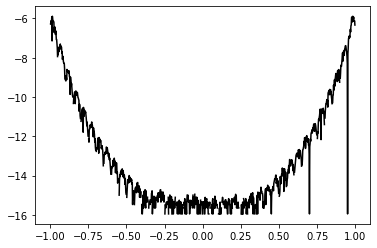

In [5]:
xnodes = np.linspace(-1.,1.,41)
fvals = ftest(xnodes)
finterp = lagrange_interpolator(xnodes,fvals,xquery)
plt.plot(xquery,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

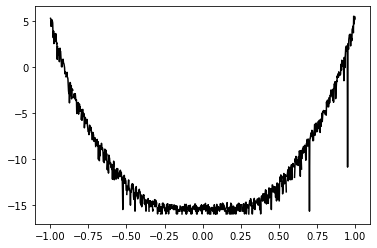

In [6]:
xnodes = np.linspace(-1.,1.,81)
fvals = ftest(xnodes)
finterp = lagrange_interpolator(xnodes,fvals,xquery)
plt.plot(xquery,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

## Clustered Meshes

So, a way to get around the Runge Phenomena is to use unevenly spaced meshes of points.  To wit, we use what are called the Chebyshev points or nodes, which are given by 

$$
x_{j} = \cos\left(\frac{2j+1}{2n+2}\pi\right), ~ j=0,\cdots,n
$$

As we see below, by essentially clustering nodes at the endpoints of the interval we wish to interpolate over, we can remove the Runge Phenomena.  This incidentally is the beginning of a long conversation in numerical analysis we will not pursue further here.  

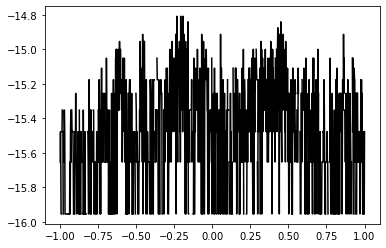

In [7]:
ncheb = 40
xcheb = np.cos(np.pi*(2.*np.arange(ncheb+1)+1.)/(2.*ncheb+2.))
fcheb = 1./(1.+xcheb**2.)
finterp = lagrange_interpolator(xcheb,fcheb,xquery)
plt.plot(xquery,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

## Linear Splines

Now we are going to try a very different approach to function approximation compared to what we did above with Lagrange Interpolation, though identical to how we developed the Trapezoid Method.  Instead of one global interpolating polynomial for given data $\left\{(x_{j},f_{j})\right\}^{N}_{j=0}$, we are going to use a piecewise defined function $S(x)$ where

$$
S(x) = \left\{ \begin{array}{rl} S_{0}(x) & x_{0}\leq x < x_{1} \\ S_{1}(x) & x_{1}\leq x < x_{2} \\ \vdots & \vdots \\ S_{n-1}(x) & x_{n-1}\leq x \leq x_{n} \end{array}\right.
$$

with the interpolation requirements

$$
S_{j}(x_{j}) = f_{j}, ~ j=0,\cdots,n-1, ~ S_{n-1}(x_{n}) = f_{n},
$$

and the continuity requirements at the interior points $\left\{x_{j}\right\}^{n-1}_{j=1}$

$$
S_{j}(x_{j+1}) = S_{j+1}(x_{j+1}), ~ j=0,\cdots,n-2.
$$

By choosing $S_{j}(x) = m_{j}(x-x_{j}) + f_{j}$, this continuity requirement gives us that 

$$
m_{j}(x_{j+1}-x_{j}) + f_{j} = f_{j+1},
$$

or 

$$
m_{j} = \frac{f_{j+1}-f_{j}}{x_{j+1}-x_{j}}, ~ j=0,\cdots,n-1.
$$

To implement this then, we use the following code.

In [ ]:
def linear_spline(xvals,fvals,xquery):
    npts = xvals.size
    qpts = xquery.size
    svals = np.zeros(qpts)
    # Precompute the slopes
    mvals = (fvals[1:]-fvals[:(npts-1)])/(xvals[1:]-xvals[:(npts-1)])
    # Now find the appropriate interval for each query point
    for ll in range(qpts):
        for jj in range(npts - 1):
            if xvals[jj]<=xquery[ll] and xquery[ll]<xvals[jj+1]:
                svals[ll] = mvals[jj]*(xquery[ll]-xvals[jj]) + fvals[jj]
                break
            svals[ll] = mvals[npts-2]*(xquery[ll]-xvals[npts-2]) + fvals[npts-2]

    return svals

In [ ]:
xquery = np.linspace(-1.,1.,int(1e3)+1)
ftrue = 1./(1.+xquery**2.)
xvals = xquery[::12]
fvals = ftrue[::12]
finterp = linear_spline(xvals,fvals,xquery)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')